# Event Displays

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['image.cmap'] = 'hot_r'
import geeksw.hgcal.testbeam as hgc

In [2]:
columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_x", "rechit_y", "rechit_z"]

In [3]:
def plot_first_event(run, title=None):
    df = hgc.load_run(run, columns=columns, entrystop=1)
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(111, projection='3d')
    x = df.query("event == '1'").rechit_x
    y = df.query("event == '1'").rechit_y
    z = df.query("event == '1'").rechit_z
    energy = df.query("event == '1'").rechit_energy
    layer = df.query("event == '1'").rechit_layer
    ax.scatter(z,x,y, s = energy, c = layer)
    if not title is None:
        plt.title(title)

## Electrons

In [4]:
hgc.run_info(384)

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
136,384,2018-10-13 10:20:00,11958,electron,250,22b,1


In [5]:
df = hgc.load_run(384, columns=columns, entrystop=1)

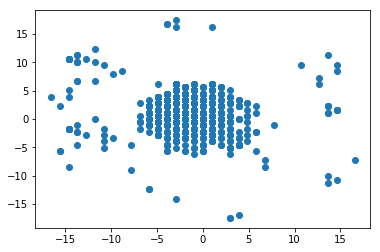

In [6]:
plt.scatter(df.rechit_x,df.rechit_y)
plt.show()

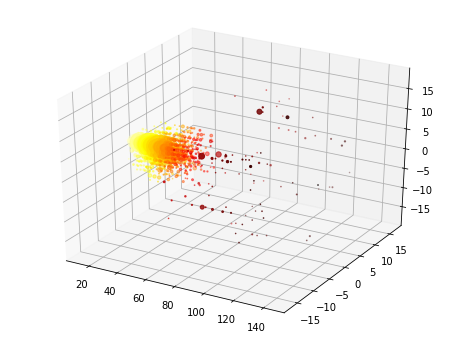

In [7]:
plot_first_event(384)

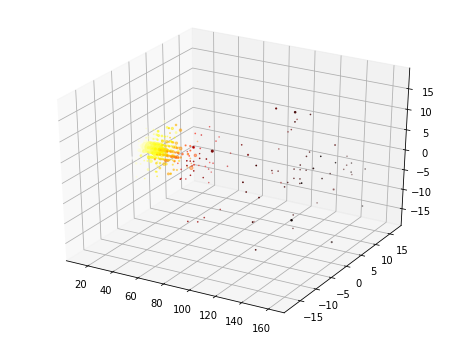

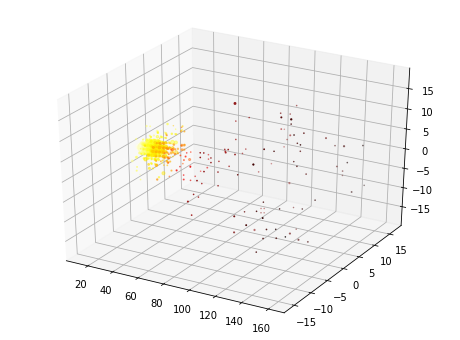

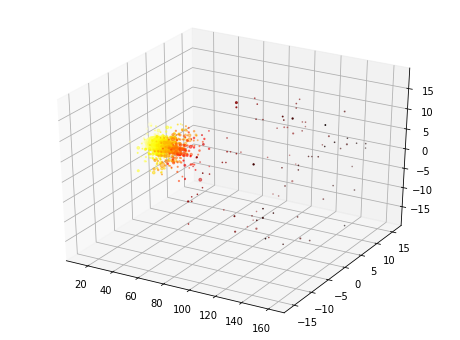

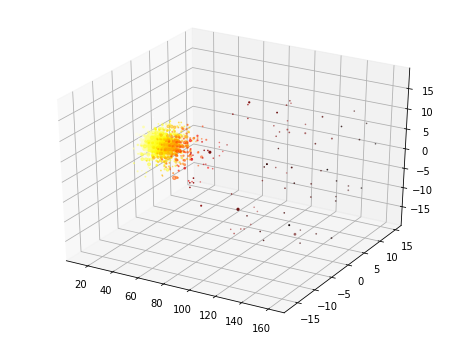

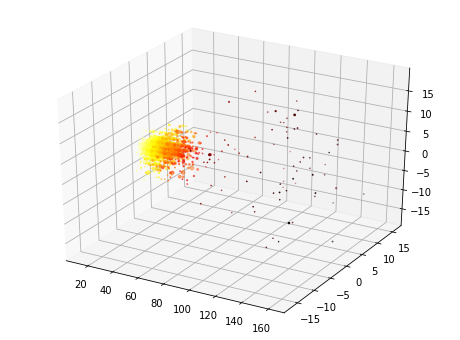

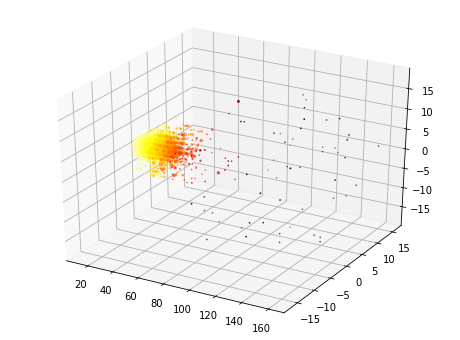

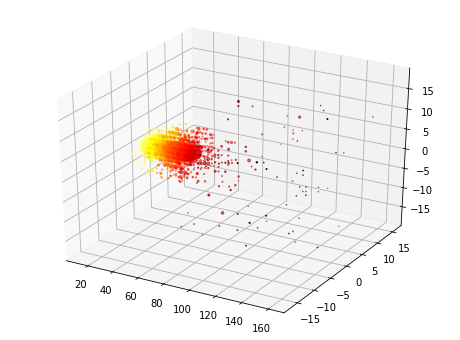

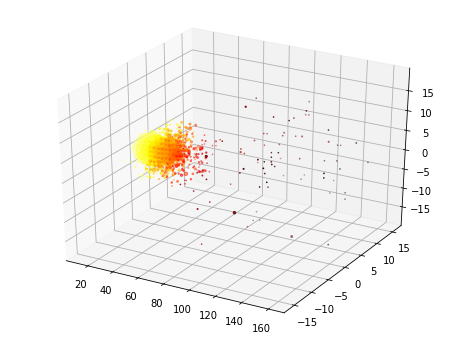

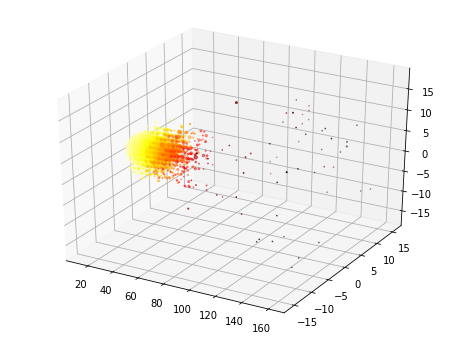

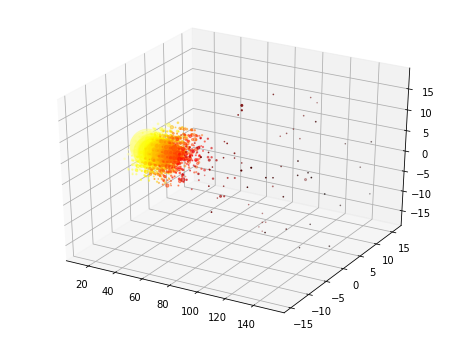

In [8]:
electron_runlist = hgc.runlist.query("Particle == 'electron' and Configuration == '23c'")

for run in electron_runlist.groupby("Energy").apply(lambda x : x.iloc[1]).Run.values:
    plot_first_event(run)

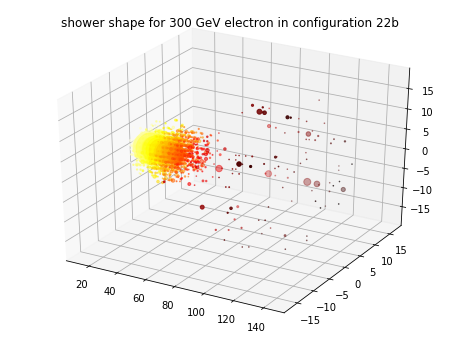

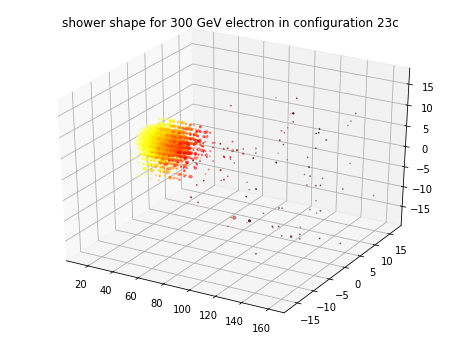

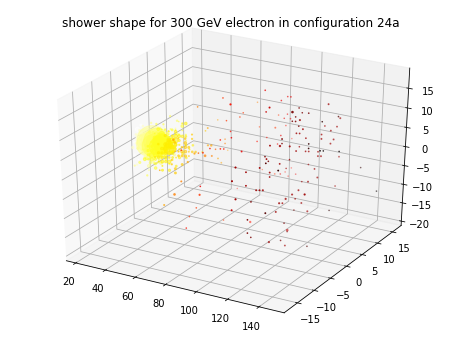

In [9]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby(["Configuration","Energy"])
electron_runlist = electron_runlist.apply(lambda x : x.iloc[0]).query("Energy == '300'")

for run, config in zip(electron_runlist.Run.values, electron_runlist.Configuration.values):
    plot_first_event(run, title="shower shape for 300 GeV electron in configuration " + str(config))

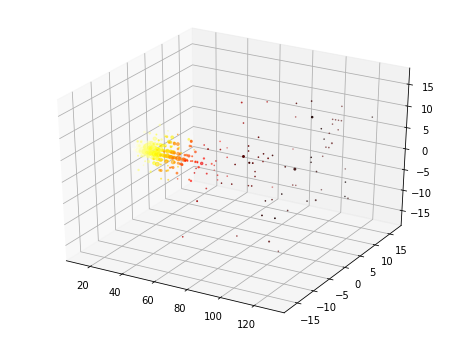

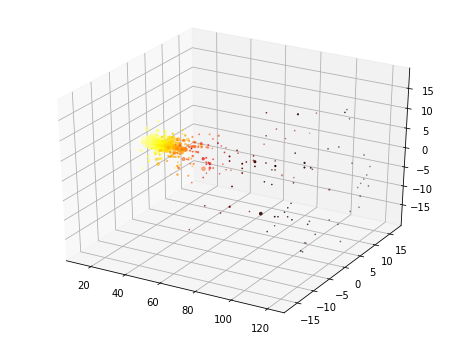

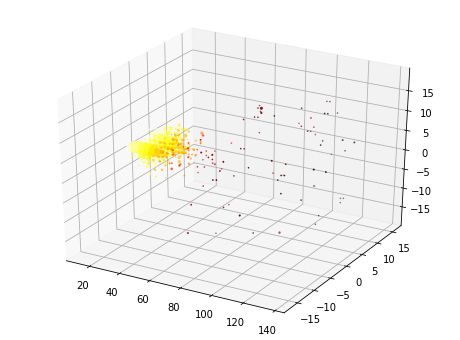

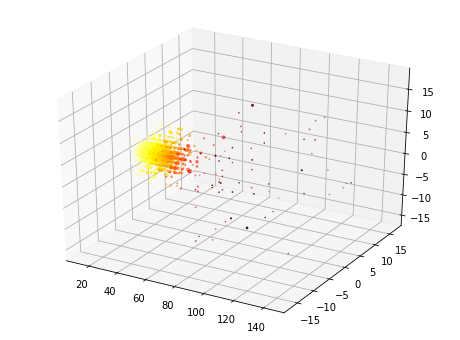

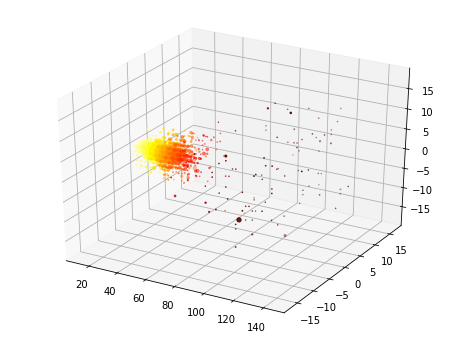

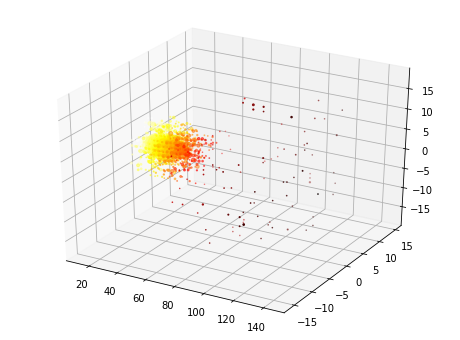

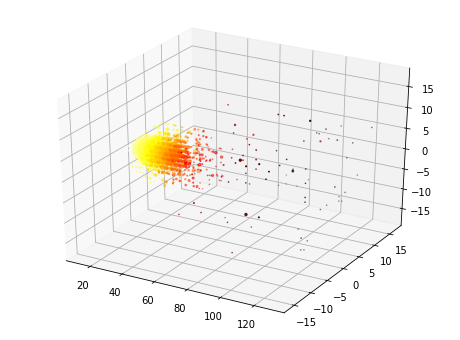

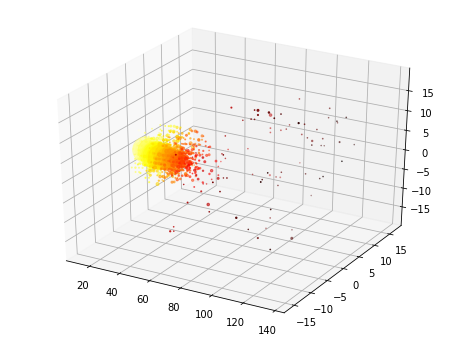

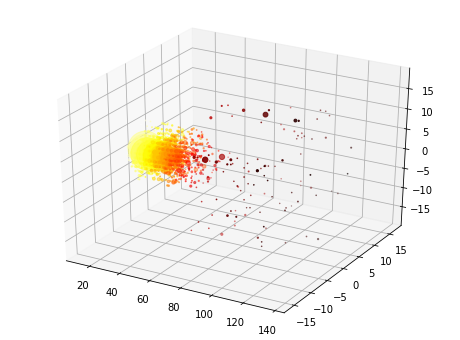

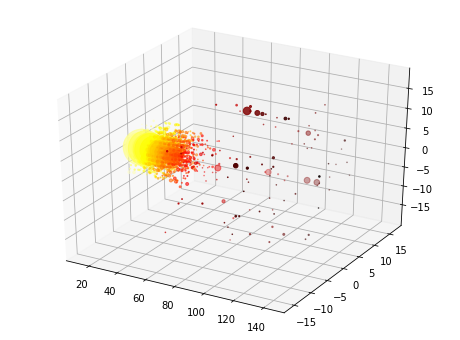

In [10]:
electron_runlist = hgc.runlist.query("Particle == 'electron'").query('Configuration == "22b"')
electron_runlist = electron_runlist.groupby("Energy").apply(lambda x : x.iloc[1])

for run in electron_runlist.Run.values:
    plot_first_event(run)

## Pions

In [11]:
hgc.run_info(512)

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
244,512,2018-10-14 16:38:00,20000,pion,300,22b,1


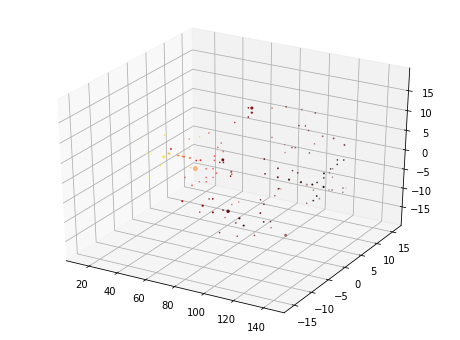

In [12]:
plot_first_event(512)

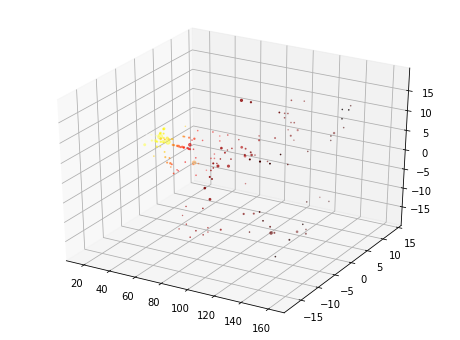

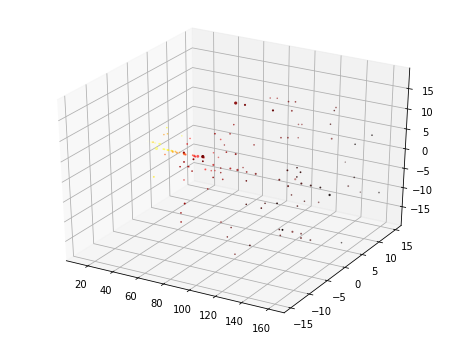

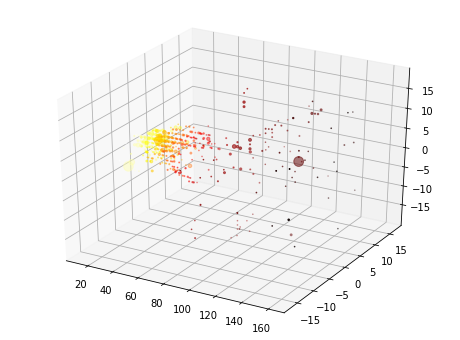

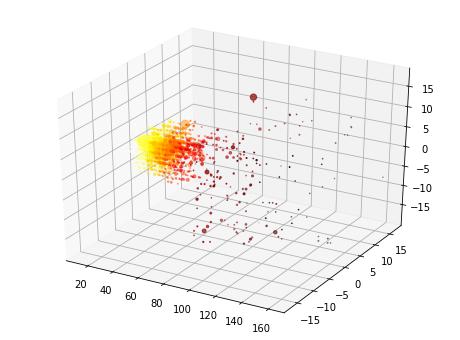

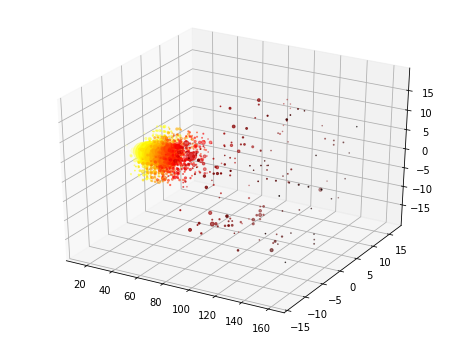

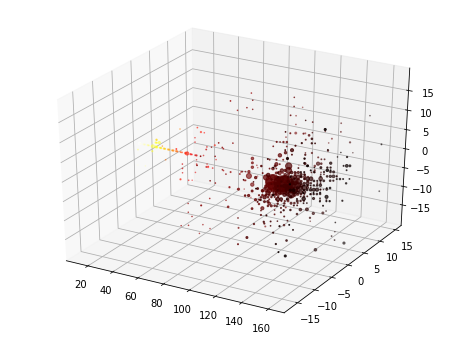

In [13]:
pion_runlist = hgc.runlist.query("Configuration == '23b' and Particle == 'pion'")

for run in pion_runlist.groupby("Energy").apply(lambda x : x.iloc[1]).Run.values:
    plot_first_event(run)

## Muons

In [14]:
hgc.run_info(718)

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
420,718,2018-10-17 05:37:00,41830,muon,200,22b,1


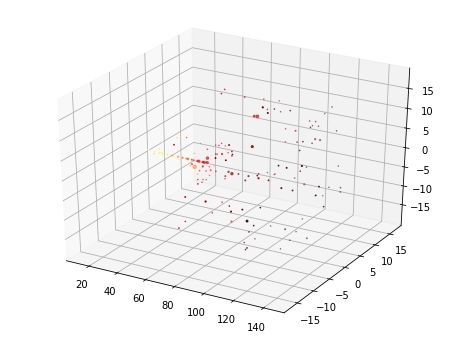

In [15]:
plot_first_event(718)

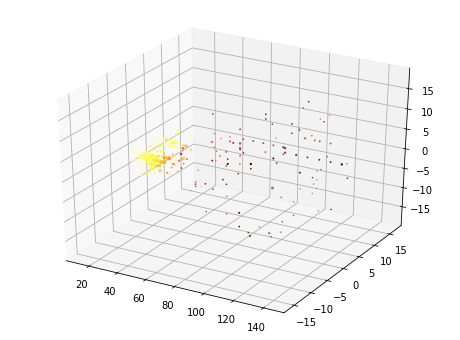

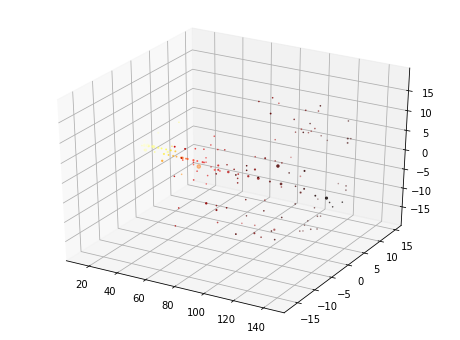

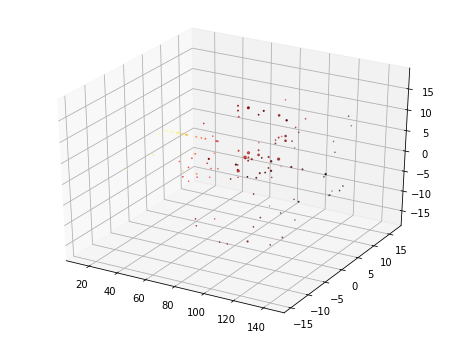

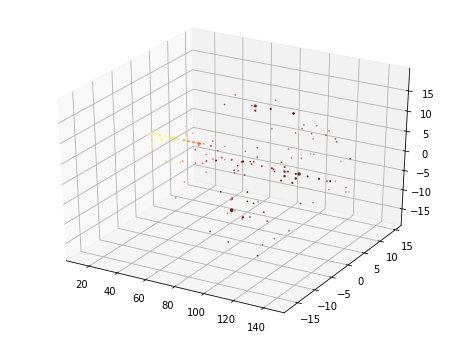

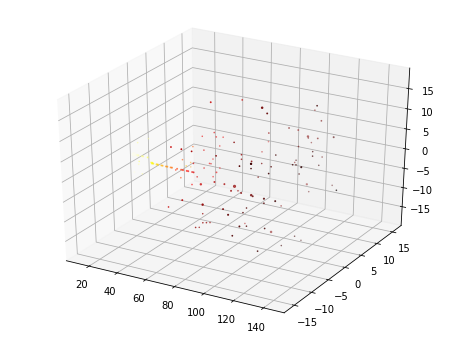

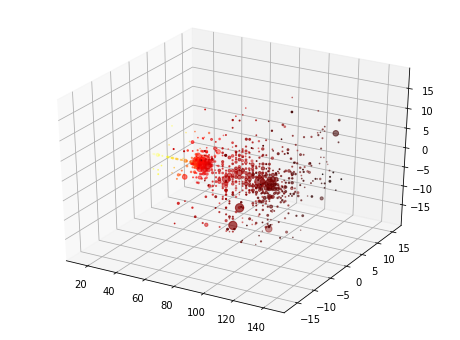

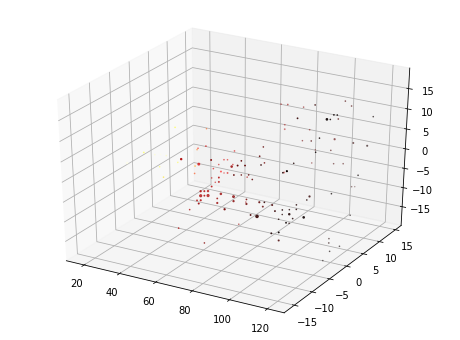

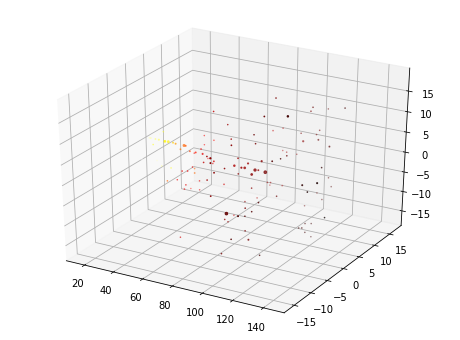

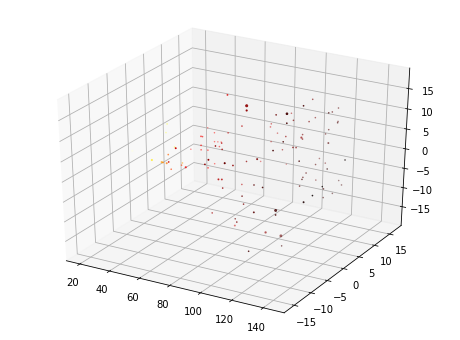

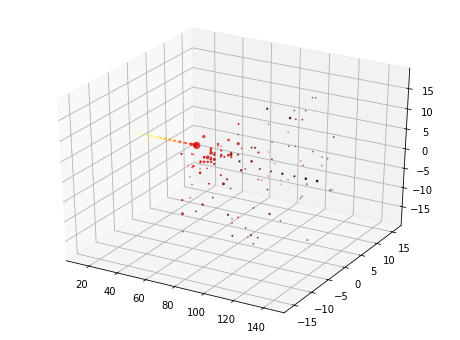

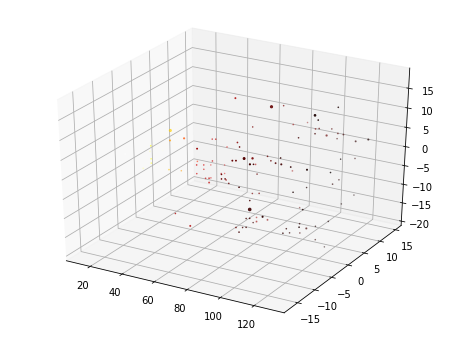

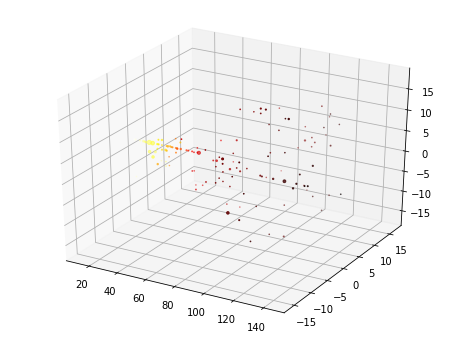

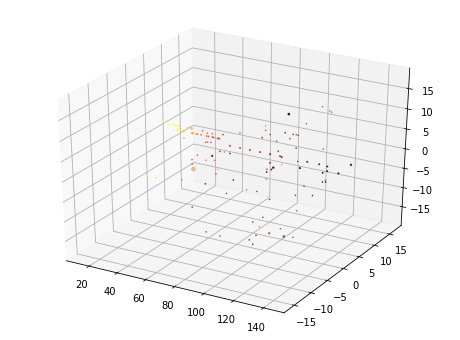

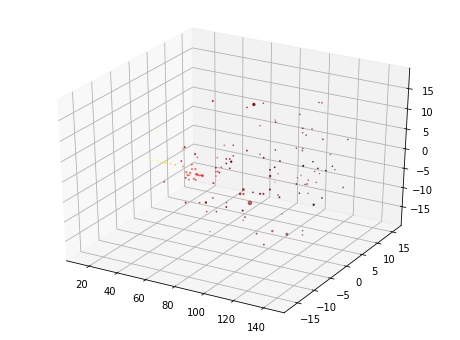

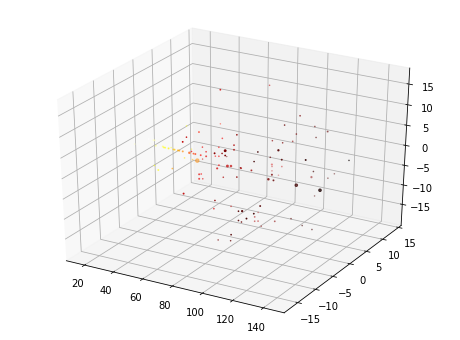

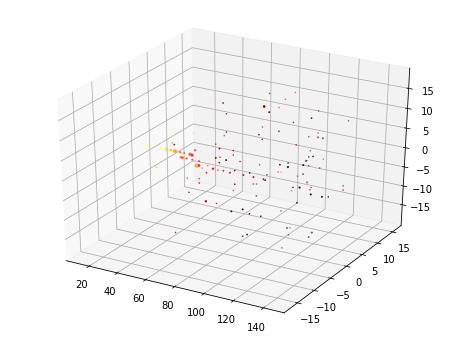

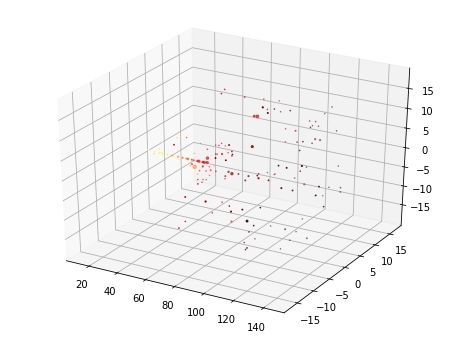

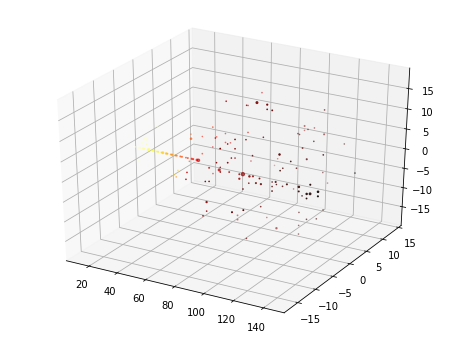

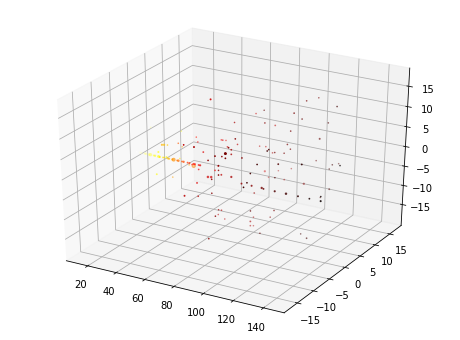

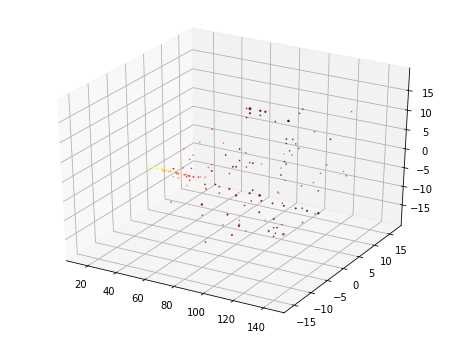

In [16]:
for run in hgc.runlist.query('Particle == "muon" and Configuration == "22b"').Run.values:
    plot_first_event(run)